In [4]:
import torch

In [5]:
torch.cuda.is_available()

True

In [6]:
from segment_anything import SamPredictor, sam_model_registry
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry


In [7]:
import cv2

image_path = "./testSeg.jpg"
test_img = cv2.imread('./testSeg.jpg', 1)

In [8]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [9]:
DEVICE

device(type='cuda', index=0)

In [40]:
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(test_img)

In [41]:
masks

[{'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 48004,
  'bbox': [207, 528, 237, 453],
  'predicted_iou': 1.0318249464035034,
  'point_coords': [[350.0, 562.546875]],
  'stability_score': 0.9650353789329529,
  'crop_box': [0, 0, 640, 1091]},
 {'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 48274,
  'bbox': [208, 227

In [10]:
import numpy as np
import matplotlib as plt
import os

In [23]:
import cv2
import supervision as sv

sam = sam_model_registry["default"](checkpoint="./checkpoint/sam_vit_h_4b8939.pth").to(device=DEVICE)

mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(test_img)

image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)

RuntimeError: CUDA out of memory. Tried to allocate 1024.00 MiB (GPU 0; 11.76 GiB total capacity; 8.50 GiB already allocated; 220.62 MiB free; 9.34 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [46]:
sam_result

[{'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 48285,
  'bbox': [208, 528, 236, 453],
  'predicted_iou': 1.0356786251068115,
  'point_coords': [[350.0, 562.546875]],
  'stability_score': 0.9653065204620361,
  'crop_box': [0, 0, 640, 1091]},
 {'segmentation': array([[False, False,  True, ...,  True,  True, False],
         [False, False,  True, ...,  True,  True, False],
         [False, False,  True, ...,  True,  True, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 59205,
  'bbox': [0, 0, 63

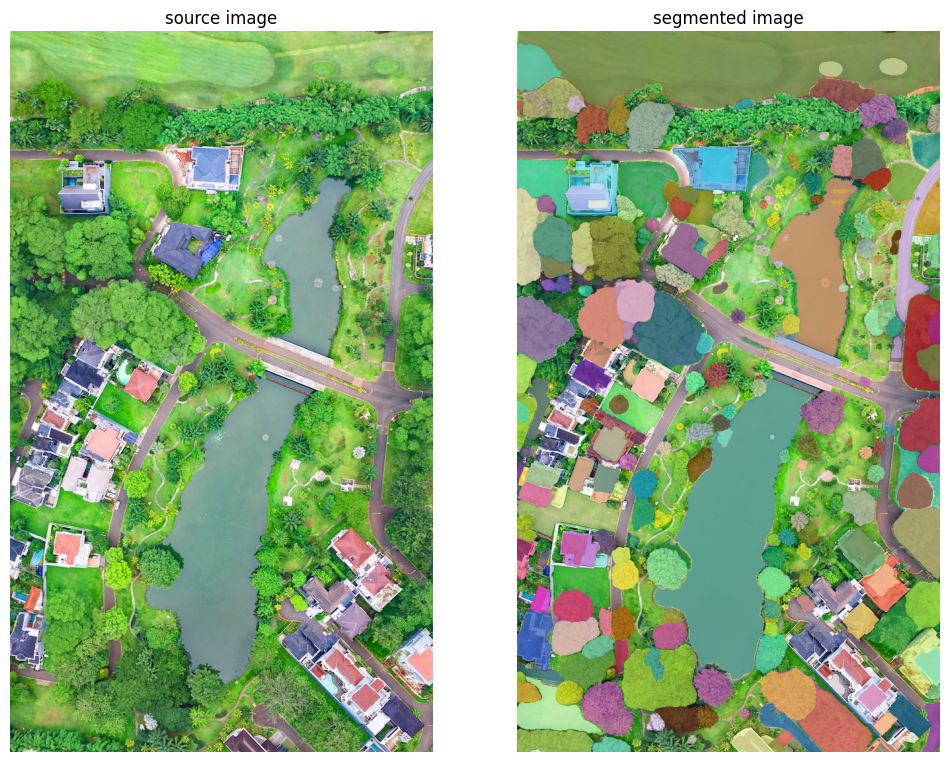

In [52]:
mask_annotator = sv.MaskAnnotator()

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[test_img, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

In [12]:
sam_h = sam_model_registry["default"](checkpoint="./checkpoint/sam_vit_h_4b8939.pth").to(device=DEVICE)
sam_l = sam_model_registry["vit_l"](checkpoint="./checkpoint/sam_vit_l_0b3195.pth").to(device=DEVICE)
sam_b = sam_model_registry["vit_b"](checkpoint="./checkpoint/sam_vit_b_01ec64.pth").to(device=DEVICE)

In [13]:
mask_generator_h = SamAutomaticMaskGenerator(sam_h)
mask_generator_l = SamAutomaticMaskGenerator(sam_l)
mask_generator_b = SamAutomaticMaskGenerator(sam_b)

In [15]:
image_path = './Containers.jpg'

image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)


sam_result_h = mask_generator_h.generate(image_rgb)


In [16]:
sam_result_l = mask_generator_l.generate(image_rgb)

In [17]:
sam_result_b = mask_generator_b.generate(image_rgb)

In [19]:
mask_annotator = sv.MaskAnnotator()

detections_h = sv.Detections.from_sam(sam_result=sam_result_h)
detections_l = sv.Detections.from_sam(sam_result=sam_result_l)
detections_b = sv.Detections.from_sam(sam_result=sam_result_b)


annotated_image_h = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections_h)
annotated_image_l = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections_l)
annotated_image_b = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections_b)


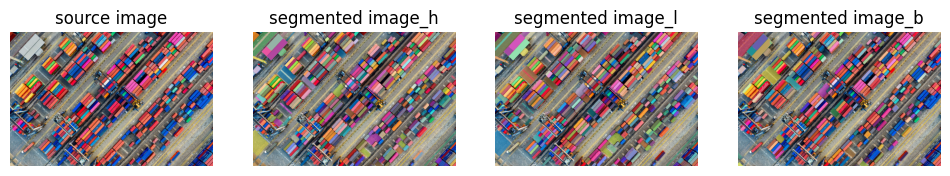

In [20]:

sv.plot_images_grid(
    images=[image_bgr, annotated_image_h, annotated_image_l, annotated_image_b],
    grid_size=(1, 4),
    titles=['source image', 'segmented image_h', 'segmented image_l', 'segmented image_b']
)

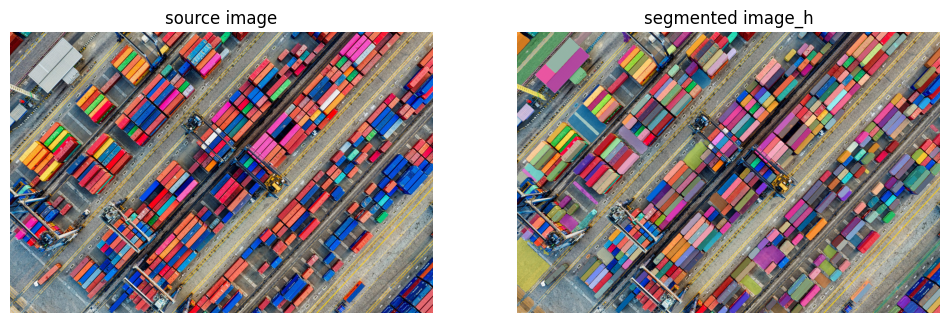

In [21]:
sv.plot_images_grid(
    images=[image_bgr, annotated_image_h],
    grid_size=(1, 2),
    titles=['source image', 'segmented image_h']
)

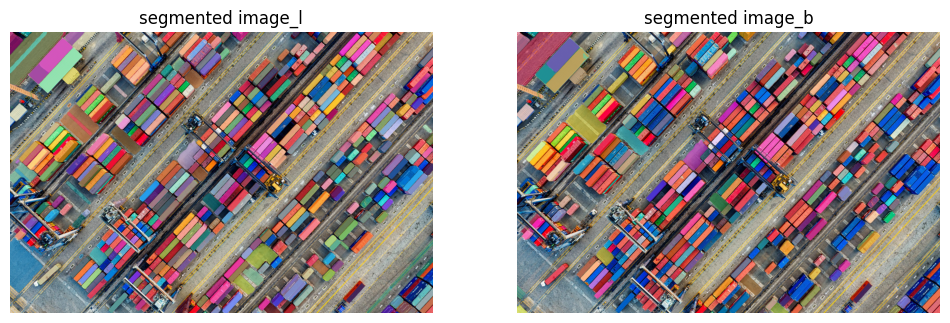

In [22]:
sv.plot_images_grid(
    images=[annotated_image_l, annotated_image_b],
    grid_size=(1, 2),
    titles=['segmented image_l', 'segmented image_b']
)